# 개요

- #### 산업은 항상 트렌드의 영향을 받고 우리가 일상에서 가장 쉽게 접할 수 있는 트렌드는 의류라고 생각함.
- #### 이에 의류 트렌드 데이터셋을 활용한 분석 및 인사이트 도출을 활용, 머신러닝을 활용한 해결 방법 구축이 목표

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용 - 리눅스 사용할때
import scipy
import scipy.stats as stats

In [2]:
### 한글 폰트 설치 - 윈도우 사용할 때
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

path = 'c:/Windows/Fonts/malgun.ttf'  # 또는 나눔고딕: 'c:/Windows/Fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

## 데이터 확인하기

In [4]:
df_trend = pd.read_csv("../datasets/shopping_trends_updated.csv")

In [5]:
df_trend.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df_trend.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
df_trend.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
num = 0
for x in range(len(df_trend.columns)):
    column = df_trend.columns[x]
    if df_trend[f"{column}"].dtype == object:
        num = num + 1
        print(f"({num}) {column}의 unique값 : " ,df_trend[f"{column}"].unique())
        print("------------------------------")

(1) Gender의 unique값 :  ['Male' 'Female']
------------------------------
(2) Item Purchased의 unique값 :  ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
------------------------------
(3) Category의 unique값 :  ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
------------------------------
(4) Location의 unique값 :  ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska

## 접근 전략
(1) 성별
(2) 연령대

- 위 두가지 요인에 대하여 각각 범주에 맞는 아이템, 의류 카테고리, 색상 정도 알아보자
- 추가로 rating의 분포에 따라서 어떤 성별, 어떤 연령대가 점수를 잘 주는지 파악해도 좋아보임.

## EDA

### 1. 성별 기준

In [10]:
pd.DataFrame(df_trend["Gender"].value_counts())

,count
Gender,
Male,2652
Female,1248


In [11]:
df_male = df_trend.query("Gender == 'Male'")
df_female = df_trend.query("Gender == 'Female'")

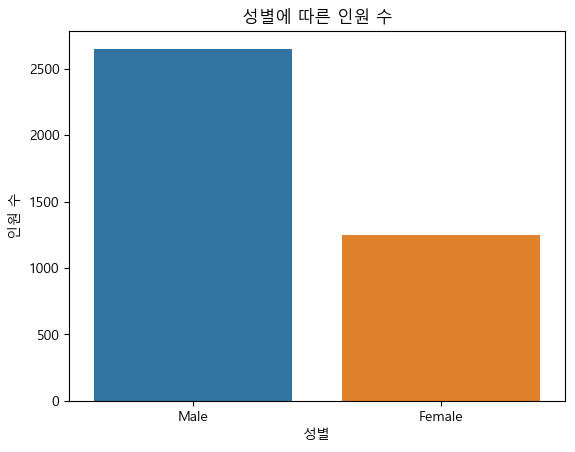

In [12]:
sns.countplot(data = df_trend, x = "Gender", hue = "Gender")
plt.title("성별에 따른 인원 수")
plt.xlabel("성별")
plt.ylabel("인원 수")
plt.show()

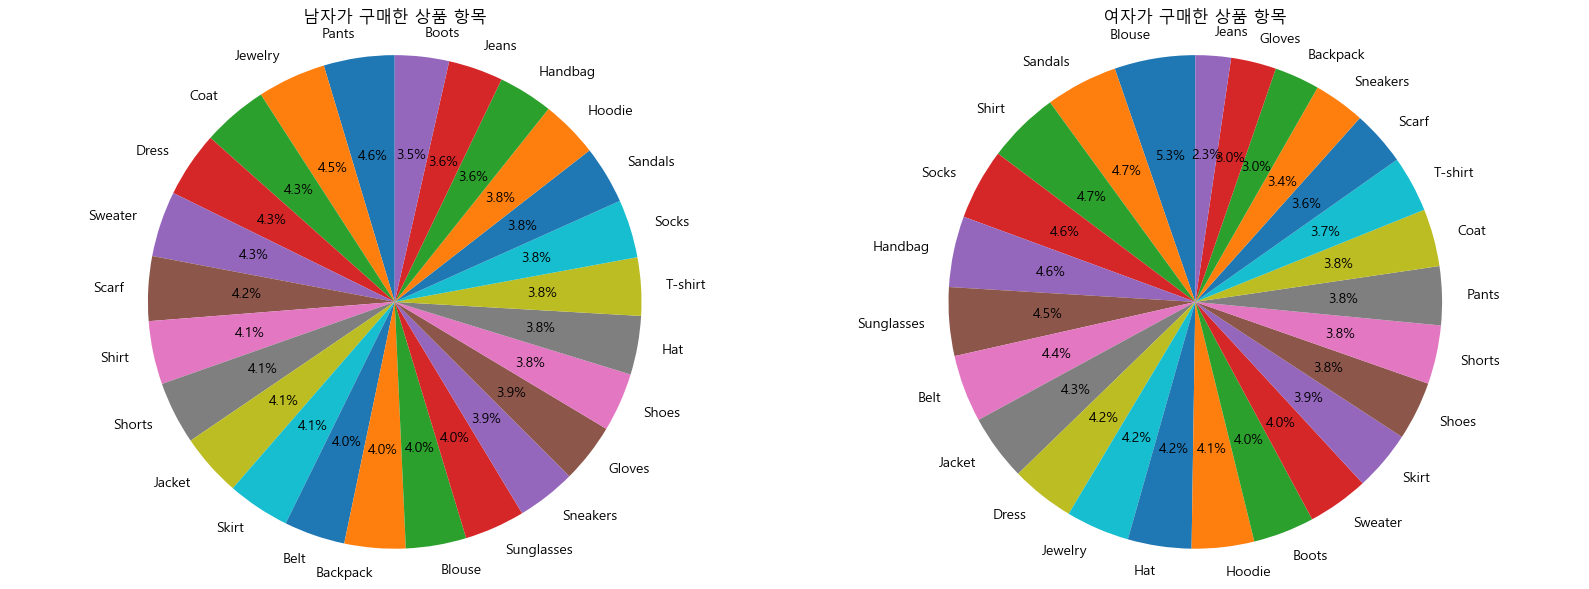

In [13]:
# 남자가 구매한 상품 수 세기
male_item_purchased = df_male['Item Purchased'].value_counts()
female_item_purchased = df_female['Item Purchased'].value_counts()

# 서브플롯으로 두 개의 파이 차트 시각화
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# 남자가 구매한 상품 수 비율
axs[0].pie(male_item_purchased, labels=male_item_purchased.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('남자가 구매한 상품 항목')
axs[0].axis('equal')  # 원형으로 표시

# 여자가 구매한 상품 수 비율
axs[1].pie(female_item_purchased, labels=female_item_purchased.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('여자가 구매한 상품 항목')
axs[1].axis('equal')  # 원형으로 표시

plt.tight_layout()  # 레이아웃 조정
plt.show()

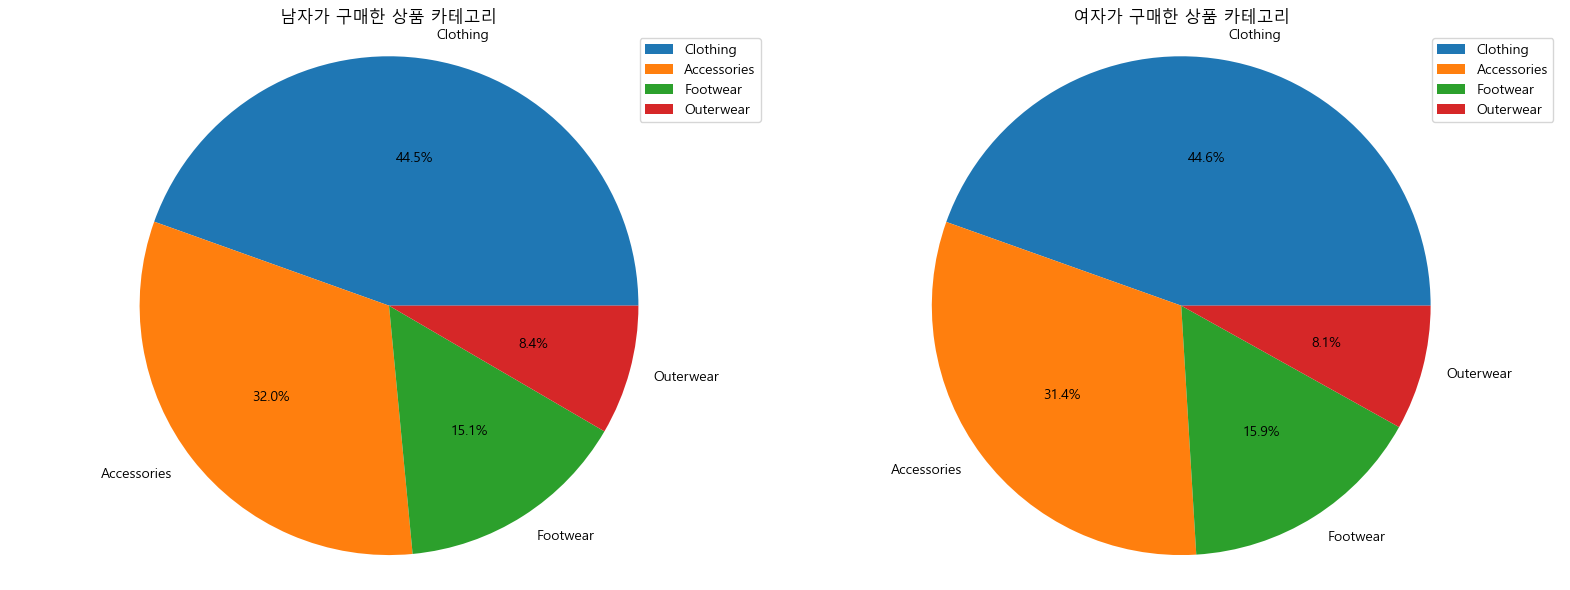

In [14]:
# 남자가 구매한 상품 수 세기
male_category = df_male['Category'].value_counts()
female_category = df_female['Category'].value_counts()

# 서브플롯으로 두 개의 파이 차트 시각화
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# 남자가 구매한 상품 수 비율
axs[0].pie(male_category, labels=male_category.index, autopct='%1.1f%%', startangle=0)
axs[0].set_title('남자가 구매한 상품 카테고리')
axs[0].axis('equal')  # 원형으로 표시
axs[0].legend(male_category.index)  # 범례 크기 조정


# 여자가 구매한 상품 수 비율
axs[1].pie(female_category, labels=female_category.index, autopct='%1.1f%%', startangle=0)
axs[1].set_title('여자가 구매한 상품 카테고리')
axs[1].axis('equal')  # 원형으로 표시
axs[1].legend(female_category.index)  # 범례 크기 조정


plt.subplots_adjust(wspace=0.3)  # 그래프 간 여백 조정
plt.tight_layout()  # 레이아웃 조정
plt.show()

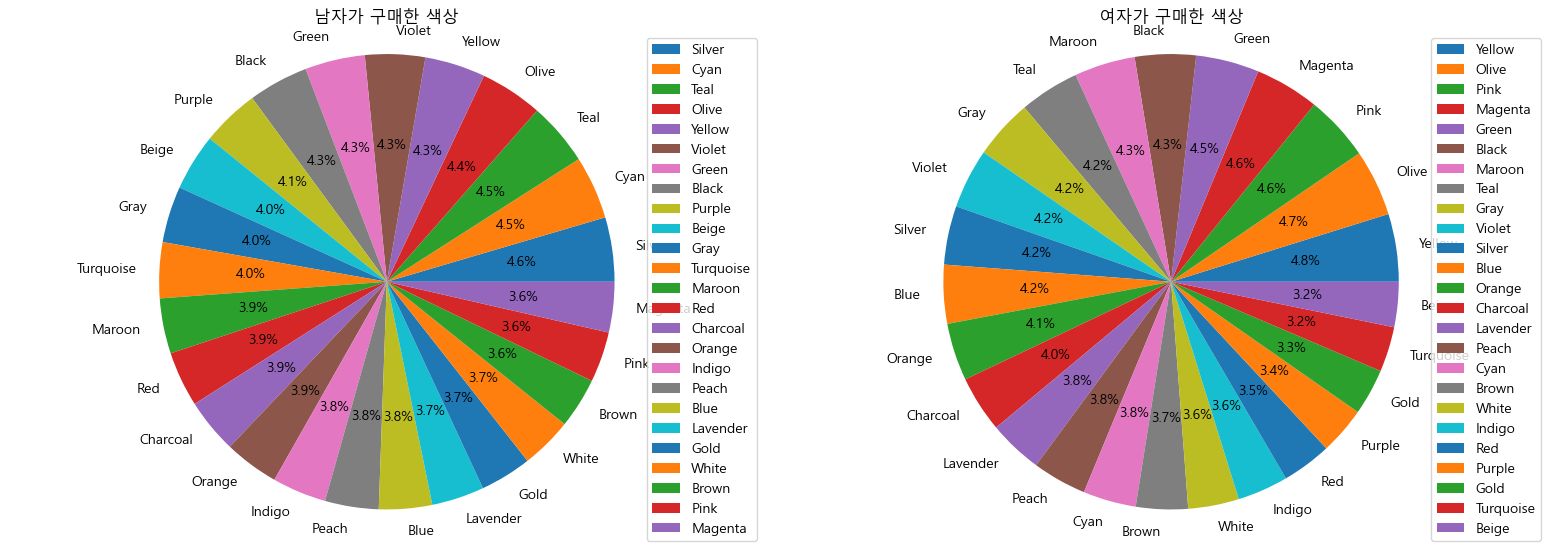

In [15]:
# 남자가 구매한 상품 수 세기
male_color = df_male['Color'].value_counts()
female_color = df_female['Color'].value_counts()

# 서브플롯으로 두 개의 파이 차트 시각화
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# 남자가 구매한 상품 수 비율
axs[0].pie(male_color, labels=male_color.index, autopct='%1.1f%%', startangle=0)
axs[0].set_title('남자가 구매한 색상')
axs[0].axis('equal')  # 원형으로 표시
axs[0].legend(male_color.index)  # 범례 크기 조정


# 여자가 구매한 상품 수 비율
axs[1].pie(female_color, labels=female_color.index, autopct='%1.1f%%', startangle=0)
axs[1].set_title('여자가 구매한 색상')
axs[1].axis('equal')  # 원형으로 표시
axs[1].legend(female_color.index)  # 범례 크기 조정


plt.subplots_adjust(wspace=0.3)  # 그래프 간 여백 조정
plt.tight_layout()  # 레이아웃 조정
plt.show()

### 2. 연령대 기준

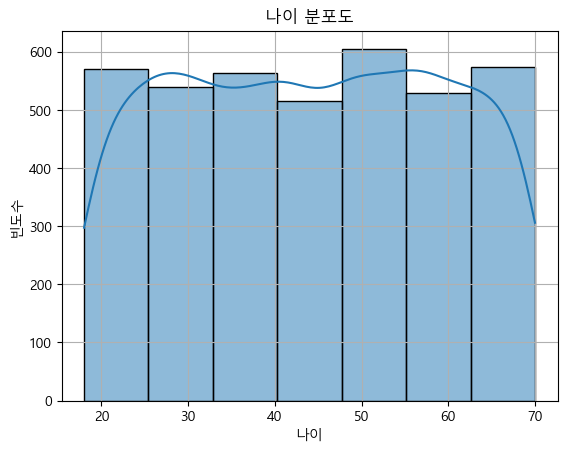

In [16]:
sns.histplot(df_trend["Age"], bins=7, kde=True)
plt.title("나이 분포도")
plt.xlabel("나이")
plt.ylabel("빈도수")
plt.grid(True)
plt.show()

In [19]:
# 나이 -> 연령대 (수치형 범주화)

def age_group(age):
    if age < 20:
        return "10대"
    elif age < 30:
        return "20대"
    elif age < 40:
        return "30대"
    elif age < 50:
        return "40대"
    elif age < 60:
        return "50대"
    elif age < 70:
        return "60대"
    else:
        return "70대 이상"

# 새로운 열 추가
df_trend["Age Group"] = df_trend["Age"].apply(age_group)

pd.DataFrame(df_trend["Age Group"].value_counts())

,count
Age Group,
50대,771
40대,739
20대,728
30대,724
60대,721
10대,150
70대 이상,67


In [21]:
df_10_people = df_trend.query("`Age Group` == '10대'")
df_20_people = df_trend.query("`Age Group` == '20대'")
df_30_people = df_trend.query("`Age Group` == '30대'")
df_40_people = df_trend.query("`Age Group` == '40대'")
df_50_people = df_trend.query("`Age Group` == '50대'")
df_60_people = df_trend.query("`Age Group` == '60대'")
df_70_people = df_trend.query("`Age Group` == '70대 이상'")

In [ ]:
# 10대 트렌드 읽기
